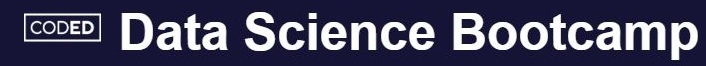

# **Task2:Data Collection: Web Scraping**



*  Log In to **Your Google Account**.
*  Create a New Notebook in the Path **Coded/Phase2/Week1/Day2**.
*  Rename the Notebook to **Phase2-Week1-Day2-Task2[YourName]**.

--------------------------------------------------------------------------------

**Apply the concepts we've learned to tackle this task and discover the solution!**


1. Write a Python script that sends an HTTP GET request to http://quotes.toscrape.com and retrieves the HTML content. Print the status of the response to ensure the request was successful.
2. Using Beautiful Soup, parse the HTML content and extract all the quotes from the page. Print each quote along with its author in a readable format.
3. Enhance your script to save the extracted quotes and authors into a CSV file named quotes.csv. Ensure the DataFrame is properly formatted before saving.

--------------------------------------------------------------------------------

* **Submit The Notebook**


#SOL

###1 Write a Python script that sends an HTTP GET request to http://quotes.toscrape.com and retrieves the HTML content. Print the status of the response to ensure the request was successful.

In [33]:
from bs4 import BeautifulSoup  # Import BeautifulSoup for parsing HTML content
import pandas as pd  # Import pandas for data manipulation and analysis
import requests  # Import the requests library

# URL to scrape
url = "http://quotes.toscrape.com"

# Send HTTP GET request
response = requests.get(url)
print(f"status code: {response.status_code}")
response.raise_for_status()  # This will raise an exception for HTTP error codes

status code: 200


###2 Using Beautiful Soup, parse the HTML content and extract all the quotes from the page. Print each quote along with its author in a readable format.

In [34]:
soup = BeautifulSoup(response.text, 'html.parser')
quotes = soup.find_all('div', class_='quote')
# Lists to store data
data=[]
for q in quotes:
    quote  = q.find('span', class_='text').get_text().strip()
    author = q.find('small', class_='author').get_text().strip()
    data.append({
        "Quote": quote,
        "Author": author
                })
# Create a pandas DataFrame
df = pd.DataFrame(data)
df

,Quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


###3 Enhance your script to save the extracted quotes and authors into a CSV file named quotes.csv. Ensure the DataFrame is properly formatted before saving.

In [35]:
df.to_csv('quotes.csv', index=False)